<a href="https://colab.research.google.com/github/Seongjin1225/AI_SCHOOL_9/blob/main/ML%26DL/12%EC%9B%94%206%EC%9D%BC/12%EC%9B%94_6%EC%9D%BC_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression 구현
- 이번에는 binary가 아닌 multi
- 즉, t의 값이 여러개(클래스가 여러개인 경우)
- ex) 학점

In [ ]:
# BMI 데이터를 이용하여 Multinomial Classification을 구현해 보아요!
# sklearn과 tensorflow를 사용하여 구현할 거에요!
# 메모리에 있는 데이터 초기화 시키는 코드
# 모델 평가하는 방법 중 1개(정확도 사용)
%reset

# 필요한 module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats

from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
# Raw Data Loading
# 그냥 read_csv로 읽으면 오류 발생! -> 데이터셋 살펴보면 위에 3줄이 주석이기 때문!
df = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/ML/bmi.csv',skiprows=3)
df.shape

# 결측치 확인 및 처리
df.isnull().sum()  # 결측치는 없어요!

# 이상치 확인!
# 독립,종속 변수 둘다 처리!
zscore = 1.8
df.loc[np.abs(stats.zscore(df['height'])) > zscore]  # height의 이상치 처리
df.loc[np.abs(stats.zscore(df['weight'])) > zscore]  # weight의 이상치 처리
df.loc[np.abs(stats.zscore(df['label'])) > zscore]  # label의 이상치 처리

x_data = df[['height','weight']].values  # 2차원
t_data = df['label'].values  # 1차원

# 정규화 진행!
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# 데이터 분할
# stratify -> 데이터 내부 비율 맞춰서 분할(class가 a,b,c 있으면 이 비율 맞춰서 분할)
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm, t_data,
                 stratify=t_data,
                 test_size=0.3,
                 random_state=0)

In [ ]:
# sklearn으로 모델 학습하고 평가를 진행!
sklearn_model = linear_model.LogisticRegression()

sklearn_model.fit(x_data_train_norm,
                  t_data_train)

predict_value = sklearn_model.predict(x_data_test_norm)

# 평가는 accuracy로 평가할 거에요!
result = accuracy_score(t_data_test, predict_value)  # (정답, 예측값)의 순서로 넣어줘야함(1차원 배열)
result

# prediction을 예측해보아요!
height = 187
weight = 80
my_state = np.array([[height,weight]])
my_result = sklearn_model.predict(scaler.transform(my_state))
my_result

array([1])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# 데이터는 위에서 불러오고, 전처리까지 끝났어요!

x_data_train_norm

keras_model = Sequential()

keras_model.add(Flatten(input_shape=(2,)))
keras_model.add(Dense(units=3,
                      activation='softmax'))
# sigmoid 사용하면 A,B,C에 대해 각각 얼마의 확률일지 계산
# softmax는 A일 확률, B일 확률, C일 확률 계산 --> pdf 그림 참조

keras_model.compile(optimizer=Adam(learning_rate=1e-2),
                    loss = 'sparse_categorical_crossentropy',   # sparse -> keras에게 알아서 원핫인코딩 처리해서 계산하라는 의미
                    metrics=['acc'])                            # sparse 없으면 내가 직접 원핫인코딩 해야함!

keras_model.fit(x_data_train_norm,
                t_data_train,
                epochs=200,
                verbose=1,
                validation_split=0.2)  # validation data를 현재 training data에서 조금 분리해 매 epoch마다 학습 및 검사 같이 진행




In [ ]:
# Evaluation(평가)을 해야 해요!
# test data 사용
model_eval = keras_model.evaluate(x_data_test_norm,
                                  t_data_test)
model_eval


# prediction을 예측해보아요!
height = 187
weight = 80
my_state = np.array([[height,weight]])
my_result = keras_model.predict(scaler.transform(my_state))
my_result

1/1 [==============================] - 0s 114ms/step


array([[2.3397159e-07, 9.9183792e-01, 8.1619006e-03]], dtype=float32)

In [ ]:
# 다른 예제를 구현해보아요!(iris - 붓꽃예제, MNIST - 손글씨 숫자 예제)
# 대표적인 예제들(MNIST -> 비전 쪽 대표 예제이므로 잘 배우자!)
# 지금까지 evaluation 할 때, accuracy만 사용했어요
# 그런데 사실 precision,recall,f1과 같은 평가지도 많이 사용되요!
# 이런 평가지표를 한방에 계산해주는 함수(library)가 있어요
# 예제를 통해 알아보아요!

from sklearn.metrics import classification_report
t_true = [0,1,2,2,2]
t_pred = [0,0,2,2,1]

label_names = ['thin','normal','fat']
print(classification_report(t_true, t_pred, target_names=label_names))  # (정답, 예측값)의 형태로 넣어줘야
# support는 대상의 개수

              precision    recall  f1-score   support

        thin       0.50      1.00      0.67         1
      normal       0.00      0.00      0.00         1
         fat       1.00      0.67      0.80         3

    accuracy                           0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5



In [ ]:
# Multinomial Classification(다중분류)
# 첫번재 예제는 BMI 예제

# 두번째 예제는 iris(붓꽃) 품종구별하는 예제!
# 붓꽃은 3가지 종이 있어요!
# setosa, versicolor, verginica
# 붓꽃의 꽃받침과 꽃잎의 길이와 너비에 따라 품종이 결정!

# 데이터는 총 150개의 데이터가 있어요!
# 꽃받침(sepal), 꽃잎(petal)

import numpy as np
import pandas as pd

from sklearn import linear_model
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

iris = load_iris()
iris.data # x_data -> 꽃받침의 길이, 너비 & 꽃잎의 길이, 너비
iris.feature_names

df = pd.DataFrame(iris.data,
                  columns=iris.feature_names)
df.columns=['sepal_length','sepal_width','petal_length','petal_width']
df

# 결측치 존재하는 지 확인
df.isnull().sum()

# 종속변수 추가
df['target'] = iris.target

# 중복행이 있을 수 있어요! 중복 데이터가 있을 수 있어요!
# 중복된 데이터가 있다고 해서 무조건 제거 금지!!
df.duplicated().sum()  # 중복행 존재하면 숫자로 알려줌
df=df.drop_duplicates()
df

# 데이터 정의
x_data = df.drop('target',axis=1,inplace=False).values
t_data = df['target']

# 이상치 체크도 해야해요! 원래는 해야해요!
# 정규화 처리를 해야해요!
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# 학습, 평가용 데이터 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm, t_data,
                 test_size=0.3,
                 stratify=t_data,
                 random_state=1)

In [ ]:
# 데이터셋이 준비되었으면 우리 Tensorflow Keras를 이용해서
# Multinomial Classification을 구현하고
# 모델 평가까지 진행해보아요!
# 정확도까지 출력
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam


keras_model = Sequential()

keras_model.add(Flatten(input_shape=(4,)))
keras_model.add(Dense(units=3,
                      activation='softmax'))

keras_model.compile(optimizer=Adam(learning_rate=1e-1),
                    loss='sparse_categorical_crossentropy',
                    metrics=['acc'])

# history 객체에 각 epoch당 발생되는 loss, acc, val_loss, val_acc를 저장
history = keras_model.fit(x_data_train_norm,
                t_data_train,
                epochs=500,
                verbose=1,
                validation_split=0.2)

# loss: 0.0842 - acc: 0.9518 - val_loss: 0.0285 - val_acc: 1.0000


In [ ]:
# 모델 평가(evaluation)
keras_model.evaluate(x_data_test_norm,
                     t_data_test)

# 0.06262040138244629, 0.9777777791023254

2/2 [==============================] - 0s 11ms/step - loss: 0.0626 - acc: 0.9778


[0.06262040138244629, 0.9777777791023254]

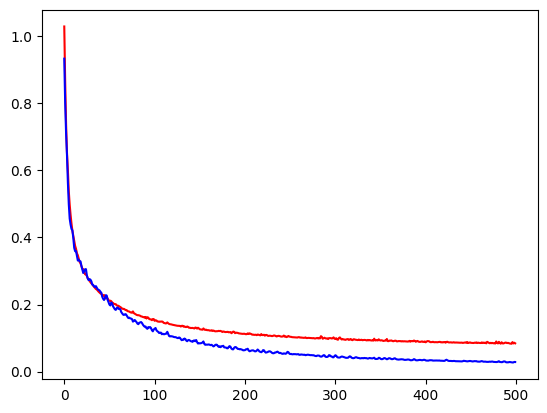

In [ ]:
# 시각화를 해보아요!
# 우리 모델이 overfitting이 발생하는지 그래프로 확인!
# history 객체가 가지고 있는 history 속성은 학습할 때 나온 데이터를 가지고 있어요
# dict로 가지고 있어요!

history.history.keys()

plt.plot(history.history['loss'],color='r')
plt.plot(history.history['val_loss'],color='b')
plt.show()